## Import libraries

In [5]:
import pandas as pd
import numpy as np


# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Read the data

In [7]:
land_temps = pd.read_csv("raw_data/landtemps2019avgs.csv")

In [8]:
land_temps.head(3)

,locationid,station,countryid,country,latabs,elevation,avgtemp
0,AE000041196,SHARJAH_INTER_AIRP,AE,United Arab Emirates,25.333,34.0,28.251667
1,AEM00041194,DUBAI_INTL,AE,United Arab Emirates,25.255,10.4,29.585833
2,AEM00041217,ABU_DHABI_INTL,AE,United Arab Emirates,24.433,26.8,29.400000


## Scatter plot between latitude(latabs) and average temperature (avgtemp)

#### Get max and min values of two columns

In [11]:
land_temps[["latabs", "avgtemp"]].min()

latabs      0.017
avgtemp   -60.821
dtype: float64

In [12]:
land_temps[["latabs", "avgtemp"]].max()

latabs     90.00
avgtemp    33.93
dtype: float64

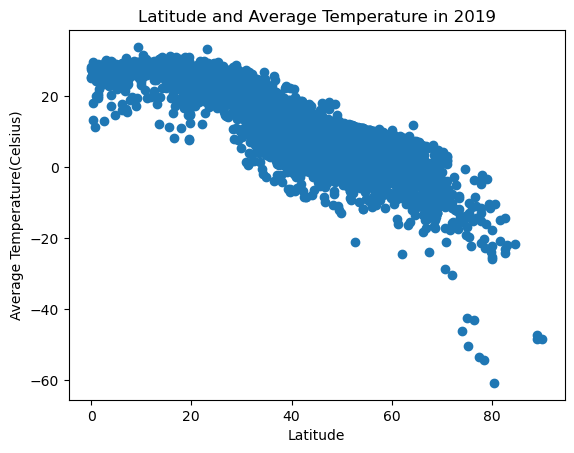

In [13]:
plt.scatter(x = "latabs",
            y = "avgtemp",
            data = land_temps)

plt.xlabel("Latitude")
plt.ylabel("Average Temperature(Celsius)")
plt.yticks(np.arange(-60,40,step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.show()

## Show the difference between high and low elevation points in 

In [15]:
low,high = land_temps.loc[land_temps.elevation <= 1000], land_temps.loc[land_temps.elevation >1000]

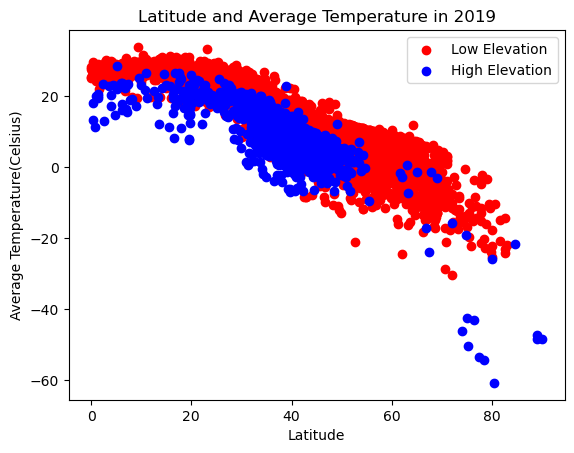

In [16]:
plt.scatter(x = "latabs",
            y = "avgtemp",
            c = "Red",
            data = low)

plt.scatter(x = "latabs",
            y = "avgtemp",
            c = "Blue",
            data = high)

plt.legend(('Low Elevation' , 'High Elevation'))
plt.xlabel("Latitude")
plt.ylabel("Average Temperature(Celsius)")
plt.title("Latitude and Average Temperature in 2019")
plt.show()

## 3-D plot of Temperature, Latitude and Elevation

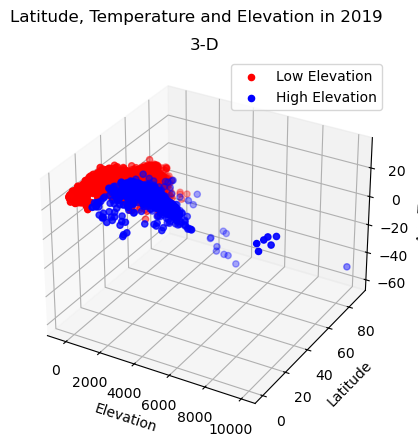

In [18]:
fig = plt.figure()
plt.suptitle("Latitude, Temperature and Elevation in 2019")
ax = plt.axes(projection = "3d")
ax.set_title("3-D")

ax.set_xlabel("Elevation")
ax.set_ylabel("Latitude")
ax.set_zlabel("Avg Temp")

ax.scatter3D(low.elevation , 
             low.latabs,
             low.avgtemp, 
             label = "Low Elevation",
             c = "Red")

ax.scatter3D(high.elevation , 
             high.latabs,
             high.avgtemp, 
             label = "High Elevation",
             c = "Blue")

ax.legend()
plt.show()

## Regression Line on Latitude on Temperature Data

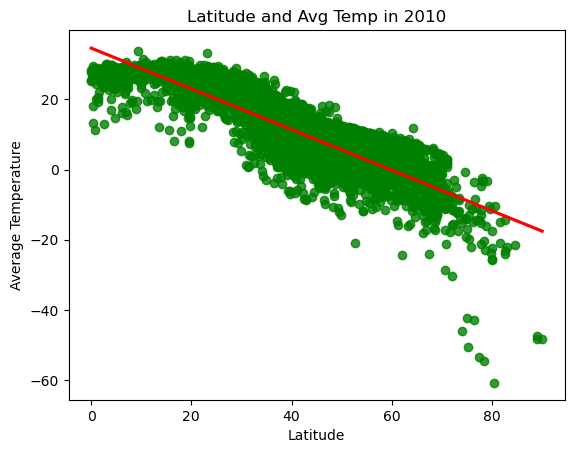

In [20]:
sns.regplot(x= "latabs",
            y = "avgtemp",
            color = "green",
            line_kws = {"color":"red"}, # changes regression line to red
            data = land_temps)
plt.title("Latitude and Avg Temp in 2010")
plt.xlabel("Latitude")
plt.ylabel("Average Temperature")
plt.show()

## Show separate regression lines for low and high elevation points

#### Create a new column in data frame to categorize values in another column

In [23]:
land_temps['elevation_group'] = np.where(land_temps.elevation <=1000, 'low' , 'high')

In [24]:
land_temps.head(5)

,locationid,station,countryid,country,latabs,elevation,avgtemp,elevation_group
0,AE000041196,SHARJAH_INTER_AIRP,AE,United Arab Emirates,25.333,34.0,28.251667,low
1,AEM00041194,DUBAI_INTL,AE,United Arab Emirates,25.255,10.4,29.585833,low
2,AEM00041217,ABU_DHABI_INTL,AE,United Arab Emirates,24.433,26.8,29.400000,low
3,AEM00041218,AL_AIN_INTL,AE,United Arab Emirates,24.262,264.9,29.061667,low
4,AFM00040938,HERAT,AF,Afghanistan,34.210,977.2,18.257500,low


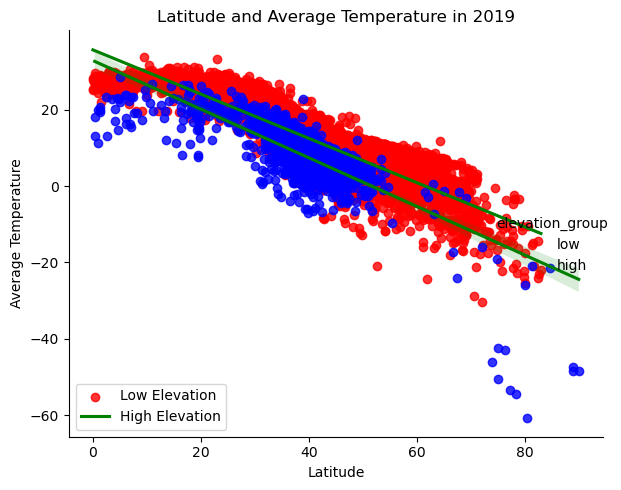

In [46]:
sns.lmplot(x = "latabs",
           y = "avgtemp",
           hue = "elevation_group",
           palette = dict(low ="red", high = "blue"),
           line_kws = {"color":"green"},
           data = land_temps)

plt.xlabel("Latitude")
plt.ylabel("Average Temperature")
plt.legend(("Low Elevation", "High Elevation"), loc = 'lower left')
plt.yticks(np.arange(-60,40,step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.tight_layout()
plt.show()

## Selecting some stations above the low and high elevation regression lines

In [44]:
high.loc[(high.latabs >38) & (high.avgtemp>=18), ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
3943,LAJES_AB,Portugal,38.7303,1016.2,18.041667
5805,WILD_HORSE_6N,United States,38.9031,1438.7,22.770000


In [49]:
low.loc[(low.latabs>47) & (low.avgtemp>=14), ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
1048,SAANICHTON_CDA,Canada,48.6167,61.0,17.820000
1146,CLOVERDALE_EAST,Canada,49.1167,50.0,14.751667
6830,WINNIBIGOSHISH_DAM,United States,47.4306,400.8,18.370000
7125,WINIFRED,United States,47.5589,988.5,16.310000


## Selecting some stations below the low and high elevation regression lines

In [53]:
high.loc[(high.latabs <5) & (high.avgtemp <18), ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
2250,BOGOTA_ELDORADO,Colombia,4.701,2548.0,14.766667
2272,SAN_LUIS,Colombia,0.862,2976.4,11.320833
2303,IZOBAMBA,Ecuador,0.350,3058.0,13.220000
2306,CANAR,Ecuador,2.550,3083.0,13.036364
2307,LOJA_LA_ARGELIA,Ecuador,4.033,2160.0,17.140909


In [55]:
low.loc[(low.latabs<50) & (low.avgtemp<-9), ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
1189,FT_STEELE_DANDY_CRK,Canada,49.5167,856.0,-12.190000
1547,BALDUR,Canada,49.2833,450.0,-10.856000
1833,POINTE_CLAVEAU,Canada,48.2667,4.0,-10.620000
1862,CHUTE_DES_PASSES,Canada,49.8333,398.0,-12.802500
6544,PRESQUE_ISLE,United States,46.6539,182.6,-9.696667
